In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
sns.set()

In [3]:
data = pd.read_csv("ToyotaCorolla.csv")
data

,Price,Age,Kilometers,Fuel_Type,HP,Metallic,Color,Automatic,CC,Doors,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,Blue,0,1300,3,69,1025
1432,10845,72,19000,Petrol,86,0,Grey,0,1300,3,69,1015
1433,8500,71,17016,Petrol,86,0,Blue,0,1300,3,69,1015
1434,7250,70,16916,Petrol,86,1,Grey,0,1300,3,69,1015


### Câu 1.1: Trực quan hoá thống kê mô tả của các thuộc tính

In [4]:
data.isna().sum()

Price            0
Age              0
Kilometers       0
Fuel_Type        0
HP               0
Metallic         0
Color            0
Automatic        0
CC               0
Doors            0
Quarterly_Tax    0
Weight           0
dtype: int64

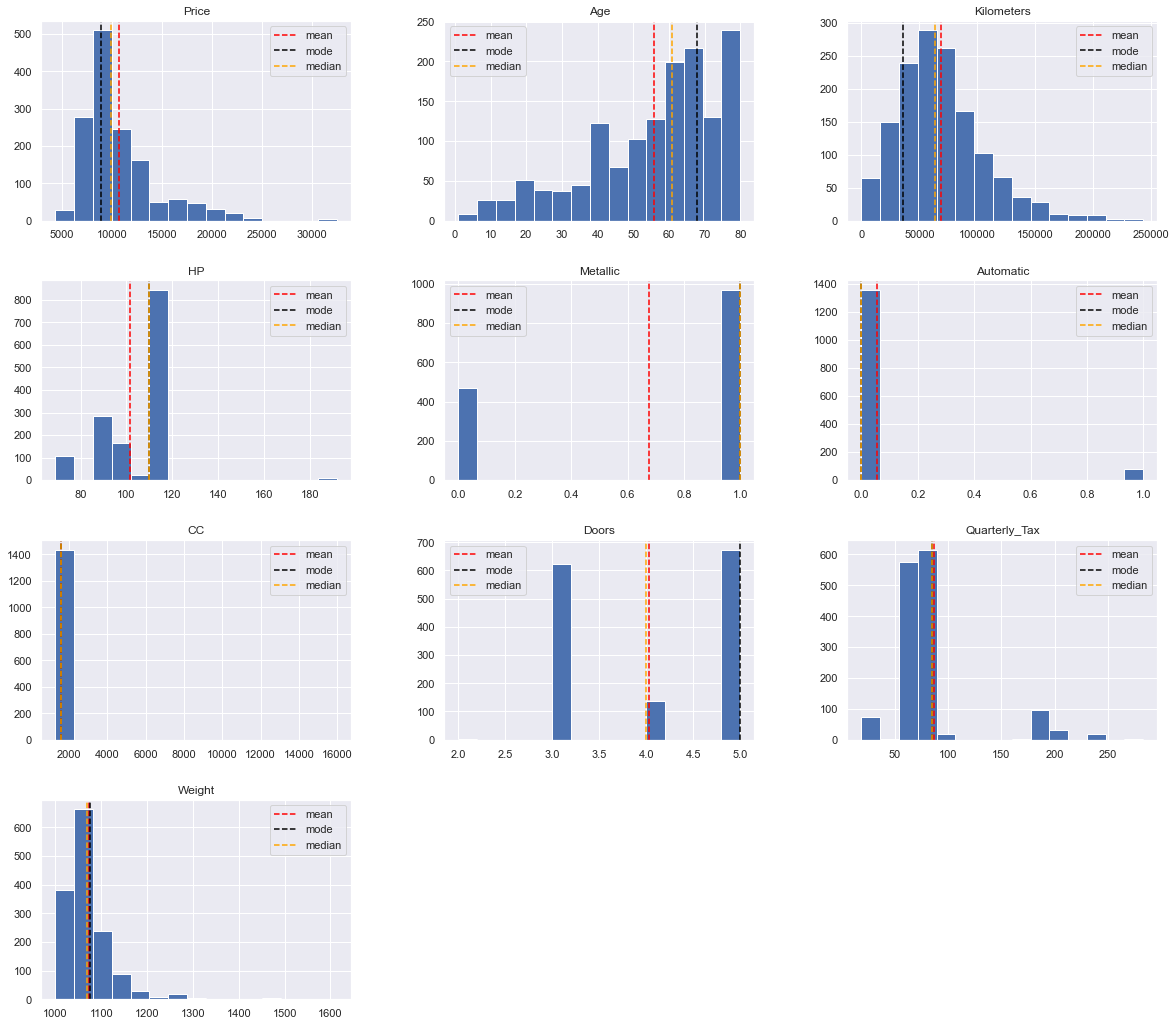

In [5]:
axes=data.hist(figsize=(20,18), bins=15)
for axes_row in axes:
    for axes_col in axes_row:
        title = axes_col.get_title()
        if(title==''):
            continue
        mean = data[title].mean()
        mode = data[title].mode(dropna=True)
        median = data[title].quantile(0.5)
        axes_col.axvline(mean, color="red",ls="--", label="mean")
        axes_col.axvline(mode[0], color="black",ls="--", label="mode")
        axes_col.axvline(median, color="orange",ls="--", label="median")
        axes_col.legend()
plt.show()

<AxesSubplot:>

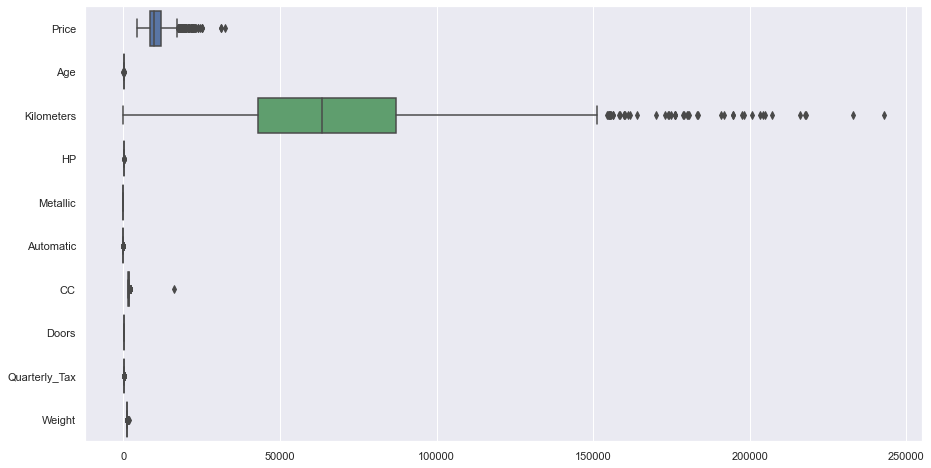

In [6]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data,orient="h" )

### 1.2. Tìm mối quan hệ giữa các biến

In [7]:
corr = data.corr()
corr

,Price,Age,Kilometers,HP,Metallic,Automatic,CC,Doors,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,-0.198431,-0.470253
Kilometers,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,-0.298432,0.089614
Metallic,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,0.011326,0.057929
Automatic,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,-0.055371,0.057249
CC,0.126389,-0.098084,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,0.109363,0.302618
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.011326,-0.055371,0.306996,0.109363,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.335637,0.302618,0.626134,1.000000


<AxesSubplot:>

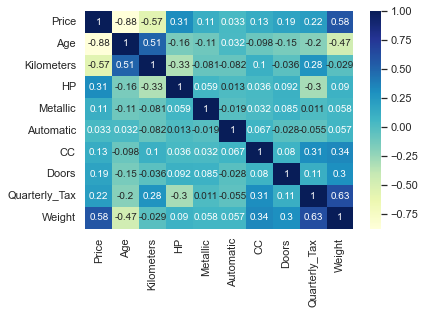

In [8]:
# Truc quan correlation matrix
sns.heatmap(corr, annot=True, cmap="YlGnBu")

**Các thuộc tính có khả năng liên quan nhau** - Age ~ Price - Kilometers ~ Price - Weight ~ Price

<AxesSubplot:xlabel='Age', ylabel='ln(Price)'>

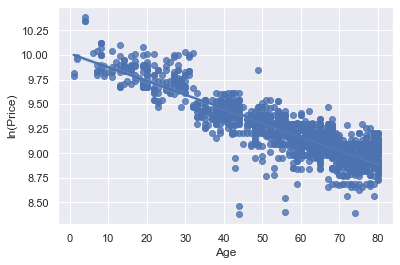

In [9]:
df = data.copy()
df["ln(Price)"] = np.log(df["Price"])
sns.regplot(data=df, x="Age", y="ln(Price)")

<AxesSubplot:xlabel='Kilometers', ylabel='ln(Price)'>

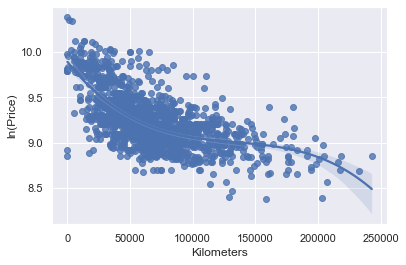

In [10]:
sns.regplot(data=df, x="Kilometers", y="ln(Price)", order=3)

<AxesSubplot:xlabel='Age', ylabel='Kilometers'>

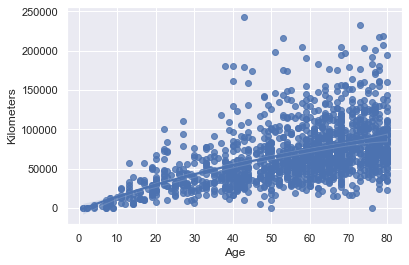

In [11]:
sns.regplot(data=df, x="Age", y="Kilometers", order=3)

<AxesSubplot:xlabel='Weight', ylabel='ln(Price)'>

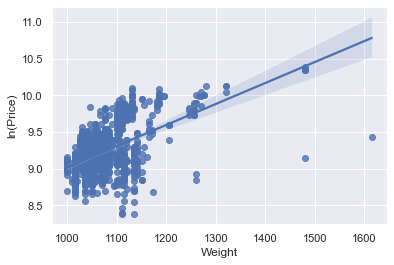

In [12]:
 sns.regplot(data=df, x="Weight", y="ln(Price)")


**Nhận xét thu được từ quan sát biểu đồ:** - Tuổi đời của xe càng lớn thì giá xe càng giảm -
Kilometers đi được càng lớn thì giá xe cũng giảm dần

### 1.3. Price theo Fuel Type and Color

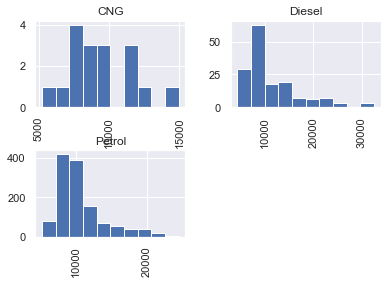

In [13]:
# Phân phối giá tiền cho Loại nhiên liệu tiêu thụ
data["Price"].hist(by=data["Fuel_Type"])
plt.show()


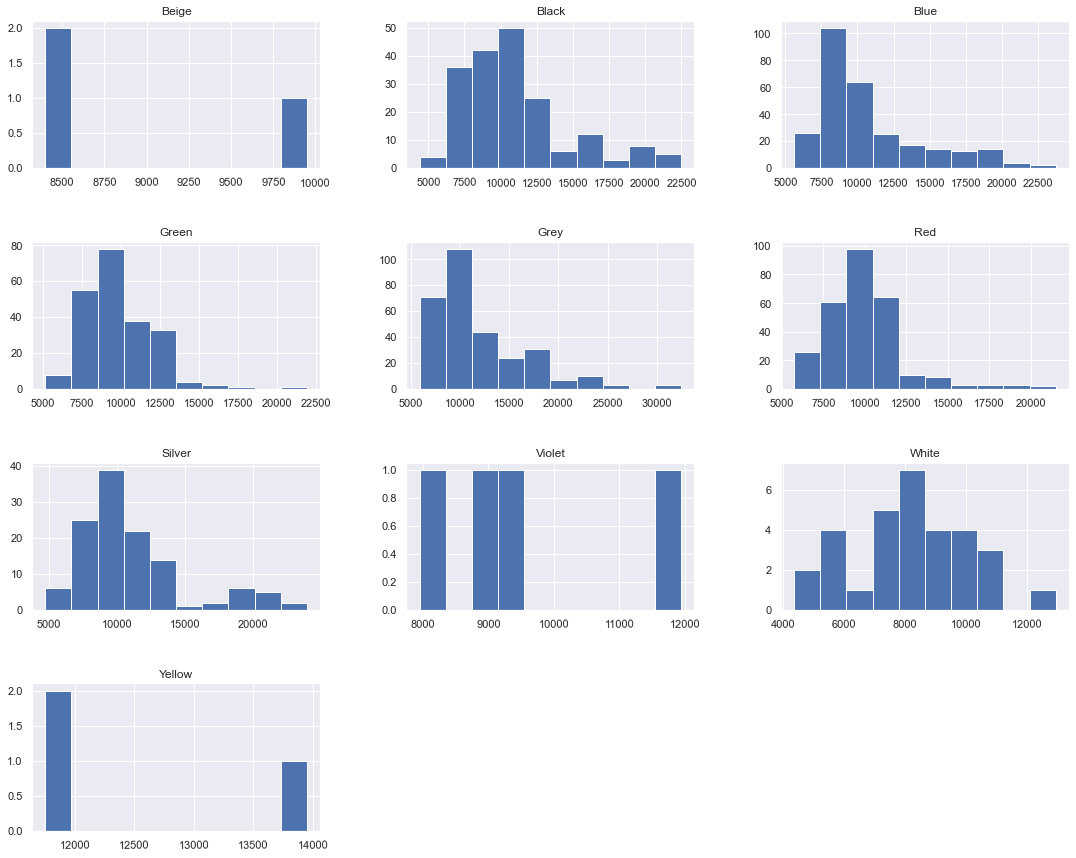

In [14]:
#Phân phối giá tiền cho màu sắc
data["Price"].hist(by=data["Color"], figsize=(18,15), xrot=1)
plt.show()

### 1.4 Ứng dụng mô hình dự đoán giá xe


In [15]:
df= data.copy()
ols = sm.OLS(df["Price"], df[["Age", "Kilometers", "Weight"]])
reg = ols.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.013e+04
Date:                Sat, 30 Jul 2022   Prob (F-statistic):                        0.00
Time:                        22:36:27   Log-Likelihood:                         -12456.
No. Observations:                1436   AIC:                                  2.492e+04
Df Residuals:                    1433   BIC:                                  2.493e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -123.4563      2.188    -56.436      0.000    -127.747    -119.165
Kilometers    -0.0236      0.001    -20.311      0.000      -0.026      -0.021
Weight        17.9553      0.104    173.327      0.000      17.752      18.158
==============================================================================
Omnibus:                      179.817   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1652.385
Skew:                          -0.190   Prob(JB):                         0.00
Kurtosis:                       8.241   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Nhận xét:** 
- Mô hình OLS cho Rsquared=0.984 (tốt)
- Giá trị p_value rất nhỏ (~0.00) => các tham số kết quả đều có ý nghĩa thống kê 
- Mô hình phù hợp: 𝑃 𝑟𝑖𝑐𝑒 − 123.4563𝐴𝑔𝑒 − 0.0236𝐾𝑖𝑙𝑜𝑚𝑒𝑡𝑒𝑟𝑠 + 17.9553𝑊𝑒𝑖𝑔ℎ�

### 2. Mô phỏng Monte Carlo

### Nhận định bài toán:

- Biến ngẫu nhiên X là số cuộc gọi trong khoảng thời gian delta_t
- X sẽ có phân phối Poisson với giá trị trung bình lambda

In [16]:
#lấy mẫu 10000 lần với cỡ mẫu 100 có phân phối poisson lambda = 2
freq_array = []
for i in range(0,10000):
    sample = np.random.poisson(lam=4, size=100)
    freq = np.sum(sample==5)/100
    freq_array.append(freq)
print("\nXac xuat de nhan 5 cuoc goi trong 2 phut",np.mean(freq_array), "\n")


Xac xuat de nhan 5 cuoc goi trong 2 phut 0.156904 



In [17]:
#lấy mẫu 10000 lần với cỡ mẫu 100 có phân phối poisson lambda = 1
freq_array = []
for i in range(0,10000):
    sample = np.random.poisson(lam=1, size=100)
    freq = np.sum(sample==0)/100
    freq_array.append(freq)
print("\nXac xuat de nhan khong cuoc goi trong 30 giay",np.mean(freq_array), "\n")


Xac xuat de nhan khong cuoc goi trong 30 giay 0.367483 



In [18]:
#lấy mẫu 10000 lần với cỡ mẫu 100 có phân phối poisson lambda = 1/3
freq_array = []
for i in range(0,10000):
    sample = np.random.poisson(lam=1/3, size=100)
    freq = np.sum(sample>=1)/100
    freq_array.append(freq)
print("\nXac xuat de nhan it nhat 1 cuoc goi trong 10 giay",np.mean(freq_array), "\n")


Xac xuat de nhan it nhat 1 cuoc goi trong 10 giay 0.284398 

